<a href="https://colab.research.google.com/github/raghu7dc/datascience/blob/main/Google_trends_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install the pytrends library

!pip install pytrends

In [2]:
#import the necessary libraries

import pandas as pd
from pytrends.request import TrendReq

In [5]:
#defininig the class TrendReq
pytrend=TrendReq()

In [8]:
#searching for the list of words "batman"
pytrend.build_payload(kw_list=["batman"])

In [11]:
#interest by country (region) data

df=pytrend.interest_by_region()

In [13]:
df.head(10)

,batman
geoName,
Afghanistan,0
Albania,0
Algeria,12
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [16]:
#changing the index of data to row numbers
df.reset_index(inplace=True)

In [17]:
df

,index,geoName,batman
0,0,Afghanistan,0
1,1,Albania,0
2,2,Algeria,12
3,3,American Samoa,0
4,4,Andorra,0
...,...,...,...
245,245,Western Sahara,0
246,246,Yemen,0
247,247,Zambia,0
248,248,Zimbabwe,0


In [23]:
#taking only values with more than 30 normalized search results
df1=df[df['batman']>30]
df1.reset_index()


,level_0,index,geoName,batman
0,9,9,Argentina,32
1,12,12,Australia,34
2,25,25,Bolivia,38
3,29,29,Brazil,32
4,38,38,Canada,33
5,44,44,Chile,33
6,53,53,Costa Rica,41
7,66,66,El Salvador,37
8,91,91,Guatemala,37
9,106,106,Ireland,32


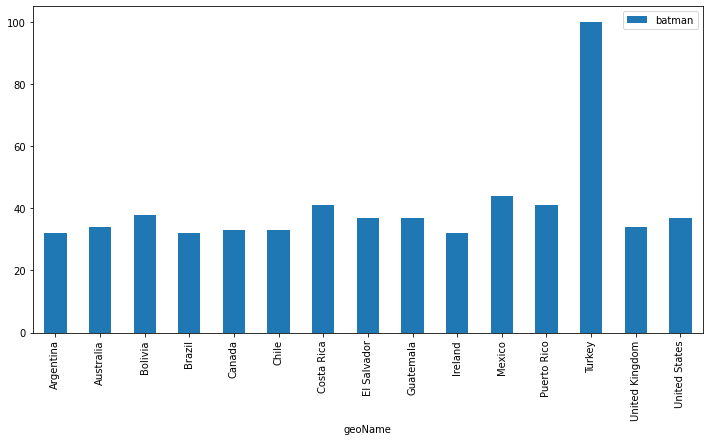

In [24]:
df1.plot(x='geoName',y='batman',kind='bar',figsize=(12,6))

In [34]:
#getting trends data over time

pytrend=TrendReq()
pytrend.build_payload(kw_list=['batman'],timeframe = '2021-01-01 2021-10-02')
df_time=pytrend.interest_over_time()


In [33]:
df_time.head()

,batman,isPartial
date,,
2021-01-03,82,False
2021-01-10,79,False
2021-01-17,81,False
2021-01-24,81,False
2021-01-31,78,False


In [38]:
df_time1=df_time[df_time['isPartial']=='False']

In [39]:
df_time1.head()

,batman,isPartial
date,,
2021-01-03,82,False
2021-01-10,79,False
2021-01-17,81,False
2021-01-24,81,False
2021-01-31,78,False


In [55]:
#resampling the data to get the monthly sum of trends data

df_resample=df_time1['batman'].resample('M').sum()

In [53]:
df_resample.head()

date
2021-01-31    401
2021-02-28    308
2021-03-31    369
2021-04-30    358
2021-05-31    391
Freq: M, Name: batman, dtype: int64

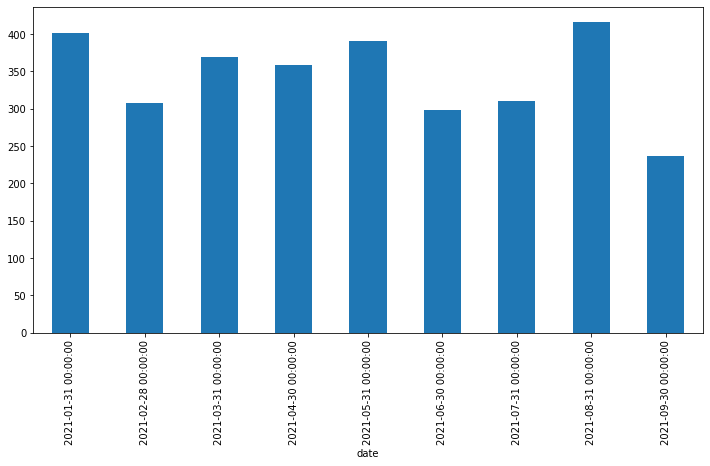

In [54]:
df_resample.plot(kind='bar',figsize=(12,6))

In [64]:
#Trending topics now

df_trending=pytrend.trending_searches(pn='india')

In [65]:
df_trending.head()

,0
0,Liverpool fc
1,Rashid khan
2,World Animal Day
3,Pandora Papers
4,Lakhimpur Kheri district


In [86]:
#top charts

df_top=pytrend.top_charts(2020,hl='en-india')

In [80]:
df_top.head()

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,


In [85]:
#today's trends
pytrend.today_searches().head()

0          Patriots
1    Dallas Cowboys
2            Eagles
3     Aaron Rodgers
4              Jets
Name: query, dtype: object

In [91]:
#getting trends using keywords

keywords=pytrend.suggestions(keyword='batman')
df_key=pd.DataFrame(keywords)

In [92]:
df_key.drop(columns='mid',inplace=True)

In [93]:
df_key

,title,type
0,The Batman,Film
1,Nicolas Batum,French professional basketball player
2,Batman Forever,1995 film
3,Batman: The Animated Series,American animated series
4,Batman,City in Turkey


In [96]:
#queries related to the actual search word

pytrend.build_payload(kw_list=['batman'])
related_queries=pytrend.related_queries()
related_queries.values()

dict_values([{'top':                      query  value
0               the batman    100
1              batman lego     65
2                     lego     63
3          batman superman     62
4                 superman     59
5            batman arkham     51
6             batman movie     42
7       batman vs superman     35
8             joker batman     25
9                    joker     24
10    batman arkham knight     23
11            robin batman     22
12                   robin     21
13           batman begins     19
14             dark knight     19
15      batman dark knight     18
16           batman movies     18
17       batman lego movie     16
18           batman series     14
19        the batman movie     14
20             batman game     12
21              new batman     12
22         the dark knight     12
23  batman the dark knight     11
24             batman cast     11, 'rising':                         query  value
0                 batman 2021  33750
1         

In [97]:
#getting the topics related to the keyword

pytrend.build_payload(kw_list=['batman'])
related_topics=pytrend.related_topics()
related_topics.values()

dict_values([{'rising':     value  ...              topic_type
0   17100  ...              Video game
1   17000  ...  Fictional supervillain
2   11450  ...                   Actor
3    3000  ...               2018 film
4    1300  ...   Manufacturing company
5    1150  ...               Franchise
6    1000  ...               2019 film
7     600  ...          City in Turkey
8     500  ...                    Film
9     450  ...             Toy company
10    450  ...                   Topic
11    450  ...               2014 film
12    300  ...       Comic book series
13    250  ...              Video game
14    250  ...               2017 film
15    250  ...                   Topic
16    200  ...              Video game
17    160  ...               2017 film
18    150  ...       Book by Jeph Loeb
19    140  ...                    Film
20     50  ...               1989 film
21     40  ...     Comic books company

[22 rows x 6 columns], 'top':     value  ...                topic_type
0     1